In [2]:
#installing libraries
import pandas as pd

In [3]:
trxn= pd.read_csv('Retail_Data_Transactions.csv')

In [4]:
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [5]:
response= pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [6]:
df= trxn.merge(response, on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [7]:
df.dtypes
df.shape
df.head()
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [8]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [9]:
#missing values
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [10]:
df= df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [12]:
#change dtypes
df['trans_date']= pd.to_datetime(df['trans_date'])
df['response']= df['response'].astype('int64')
df
                                 

C:\Users\sonam\AppData\Local\Temp\ipykernel_19980\623235910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\sonam\AppData\Local\Temp\ipykernel_19980\623235910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response']= df['response'].astype('int64')


,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [13]:
set(df['response'])

{0, 1}

In [14]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [15]:
from scipy import stats
import numpy as np
z_scores= np.abs(stats.zscore(df['tran_amount']))
threshold= 3
outliers= z_scores>threshold
print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [16]:
from scipy import stats
import numpy as np
z_scores= np.abs(stats.zscore(df['response']))
threshold= 3
outliers= z_scores>threshold
print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


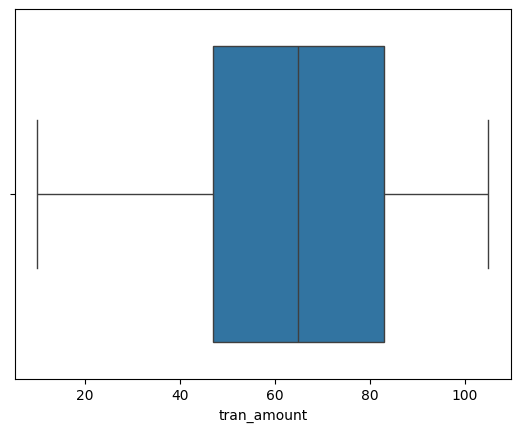

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['tran_amount'])
plt.show()

In [18]:
#creating new columns
df['month']= df['trans_date'].dt.month
df

C:\Users\sonam\AppData\Local\Temp\ipykernel_19980\2807992720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']= df['trans_date'].dt.month


,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [19]:
#which 3 month have had the highest transaction amounts?
monthly_sales= df.groupby('month')['tran_amount'].sum()
monthly_sales= monthly_sales.sort_values(ascending=False).reset_index().head(3)
monthly_sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [20]:
#customers havinhg highest no. of orders
customer_counts= df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','count']
top_5_cus= customer_counts.sort_values(by='count',ascending=False).head(5)
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
7,CS2620,35
5,CS3013,35


<Axes: xlabel='customer_id', ylabel='count'>

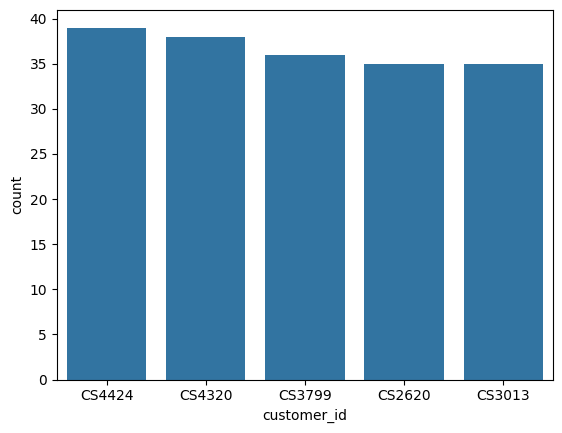

In [21]:
sns.barplot(x='customer_id',y='count',data=top_5_cus)

In [22]:
#customer having highest value of orders

customer_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

#sort

top_5_sal= customer_sales.sort_values(by='tran_amount',ascending=False).head(5)
top_5_sal

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

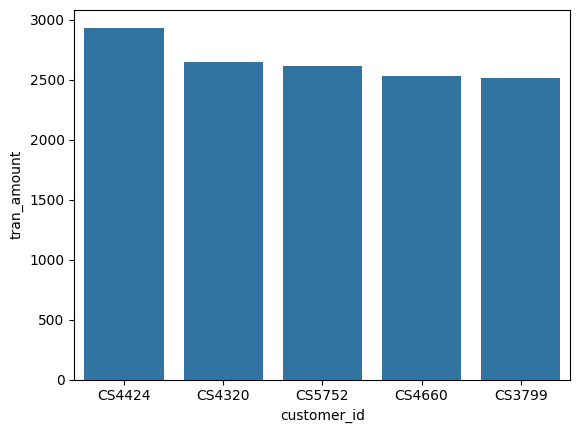

In [23]:
sns.barplot(x='customer_id',y='tran_amount',data=top_5_sal)

C:\Users\sonam\AppData\Local\Temp\ipykernel_19980\3011806683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']= df['trans_date'].dt.to_period('M')


AttributeError: module 'matplotlib.dates' has no attribute 'Monthlocator'

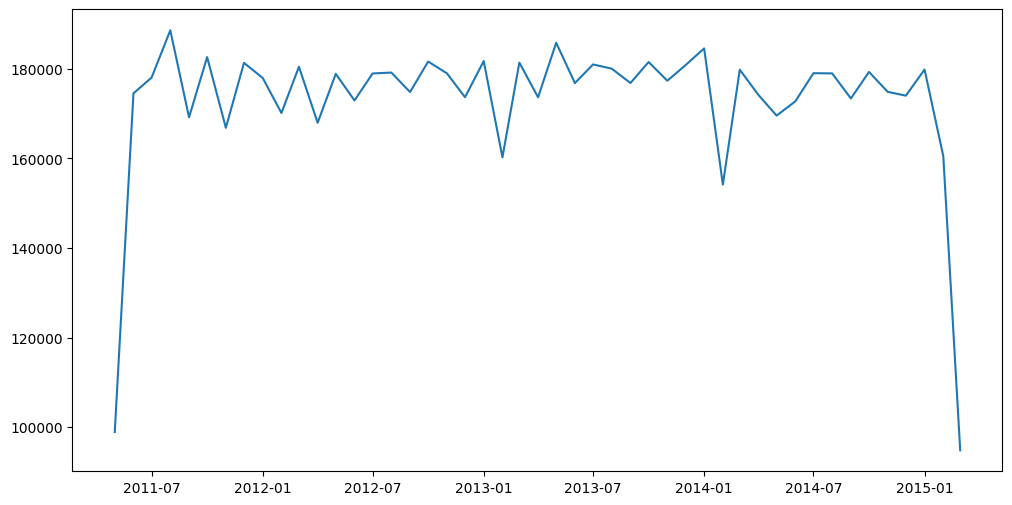

In [25]:
import matplotlib.dates as mdates
df['month_year']= df['trans_date'].dt.to_period('M')

monthly_sales= df.groupby('month_year')['tran_amount'].sum()
monthly_sales.index= monthly_sales.index.to_timestamp()
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index,monthly_sales.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.Monthlocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')                                                         
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()                                                         

This displays the final line plot, showing the trend in monthly sales across the specified period.

In [32]:
#recency
recency= df.groupby('customer_id')['trans_date'].max()
#frequency
frequency= df.groupby('customer_id')['trans_date'].count()
#monetory
monetary= df.groupby('customer_id')['tran_amount'].sum()
#combine
rfm= pd.DataFrame({'recency':recency, 'frequency':frequency, 'monetary':monetary})
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [33]:
#customer segmentation
def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
        return 'P0'
    elif (2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetary']<=1000):
        return 'P1'
    else:
        return 'P2'
rfm['segment']= rfm.apply(segment_customer,axis=1)
rfm

,recency,frequency,monetary,segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


This labels each customer based on their purchasing behavior and engagement level.

<Axes: xlabel='response'>

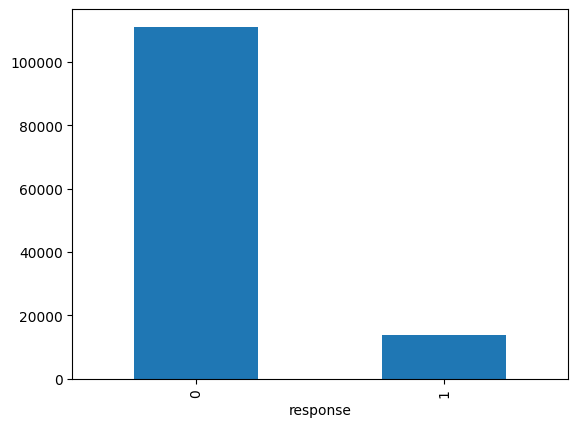

In [34]:
#count the no. of churned and active customers
churn_counts= df['response'].value_counts()
churn_counts.plot(kind='bar')

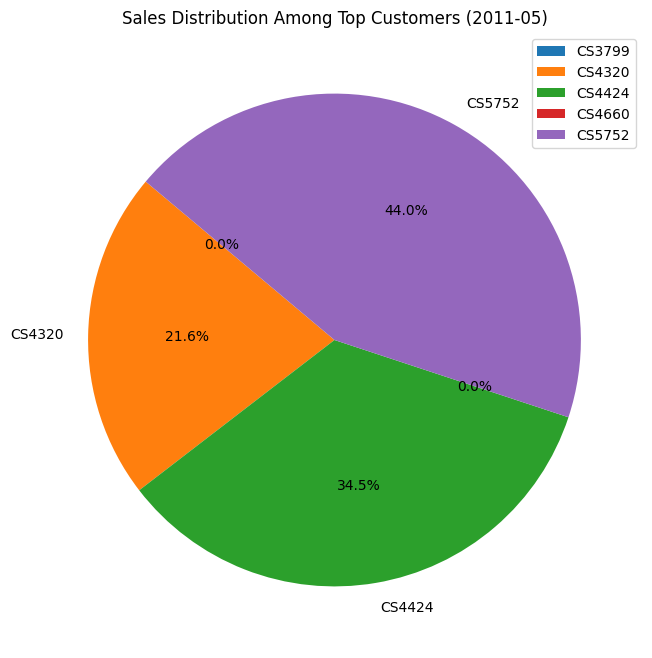

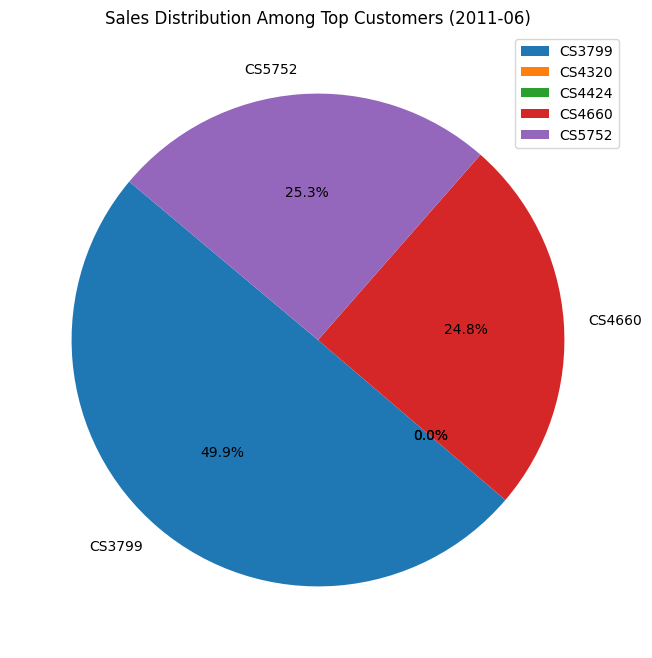

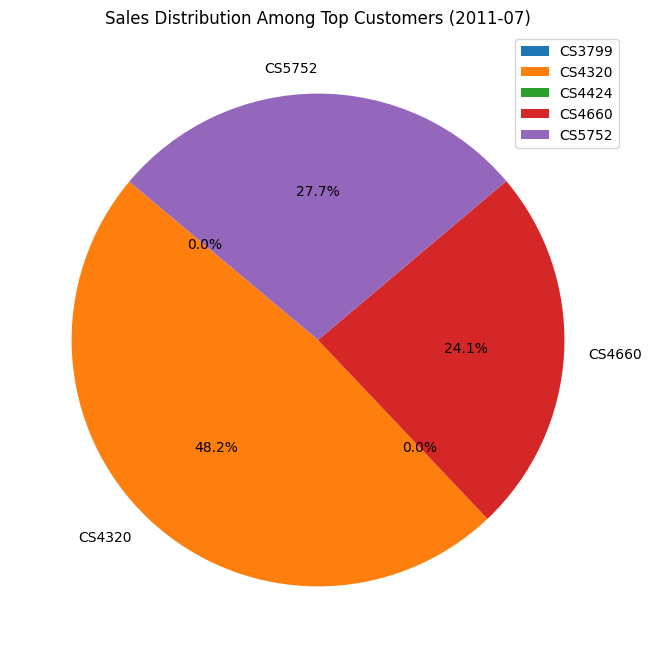

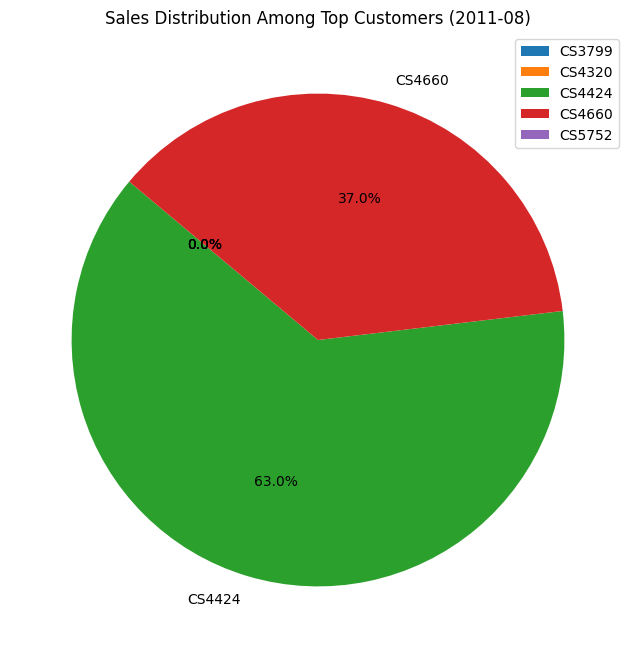

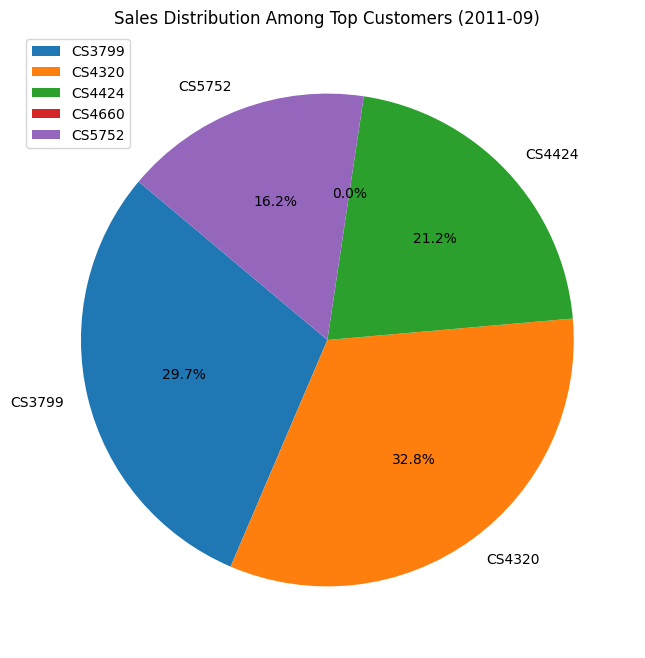

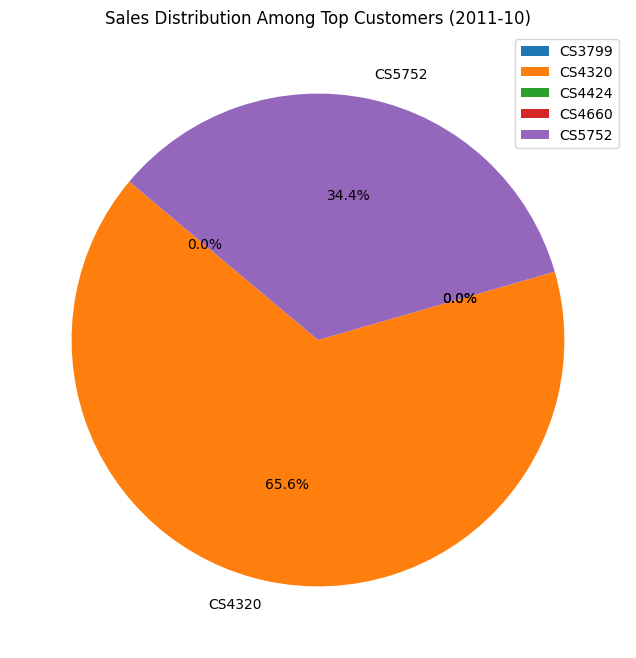

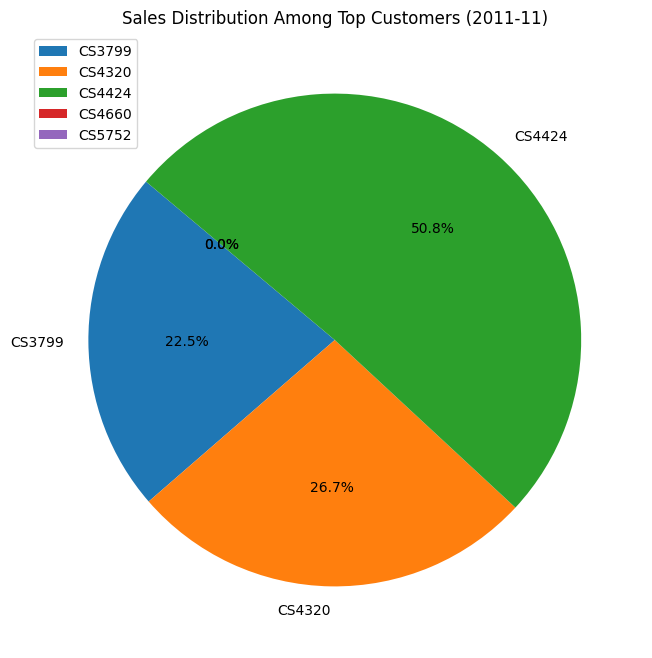

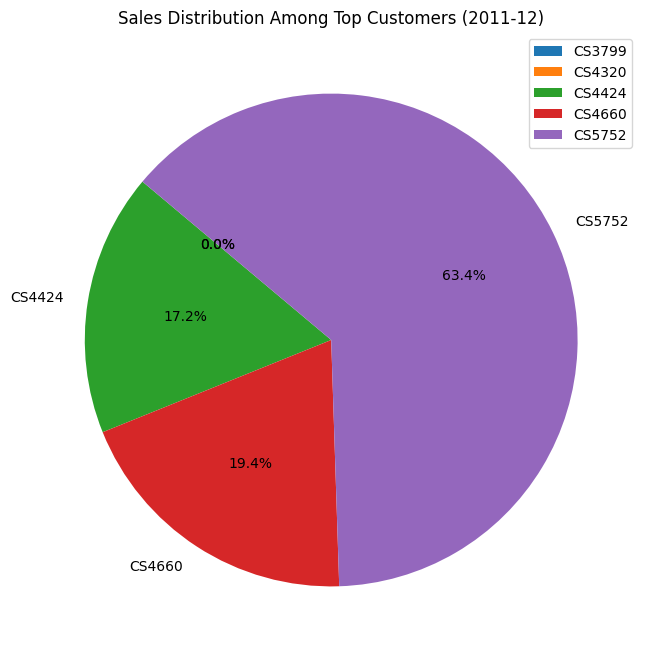

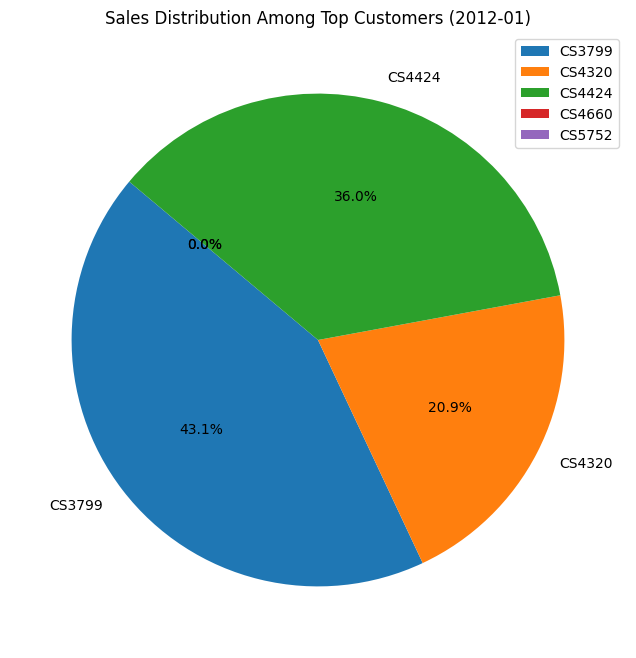

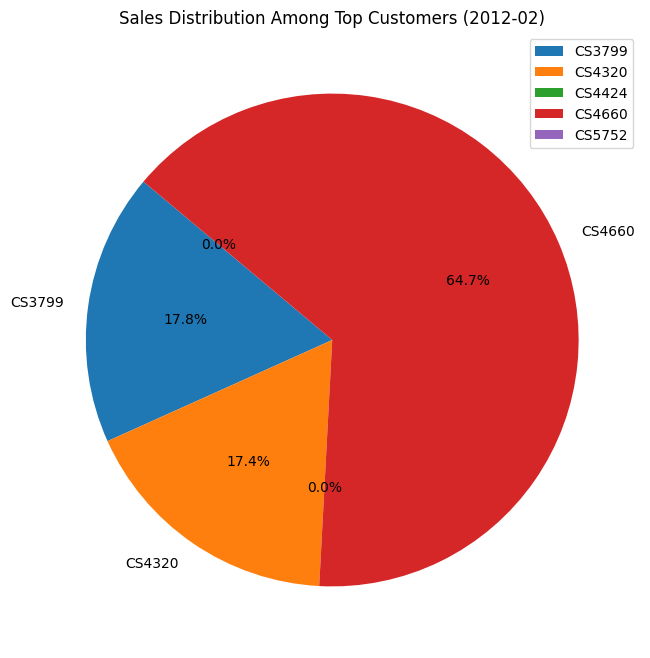

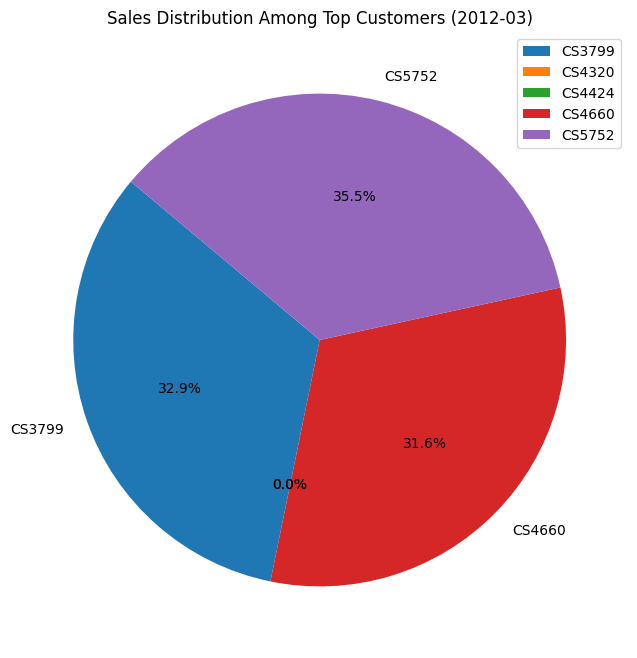

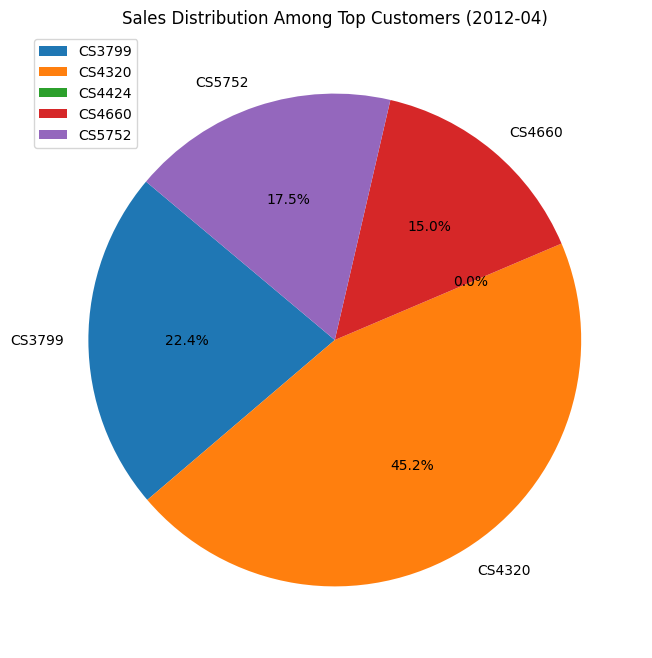

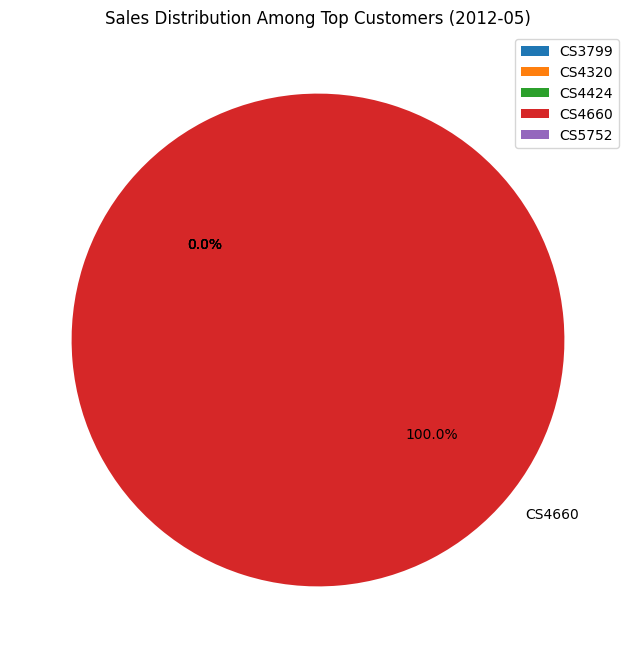

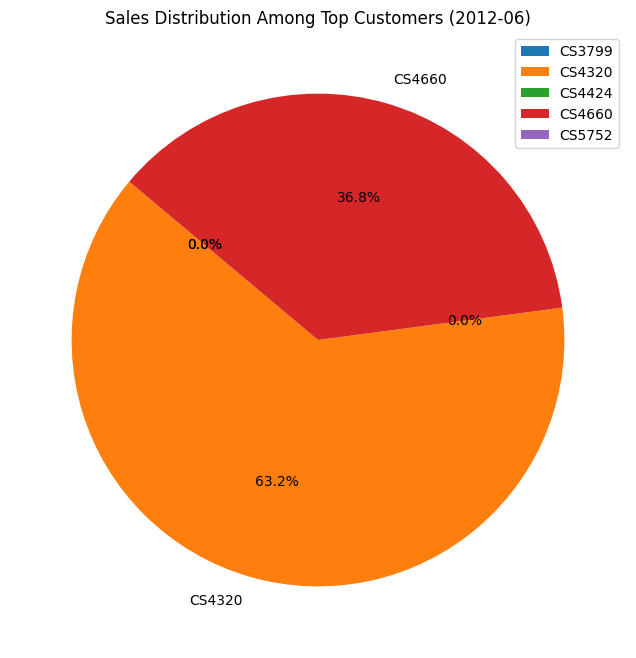

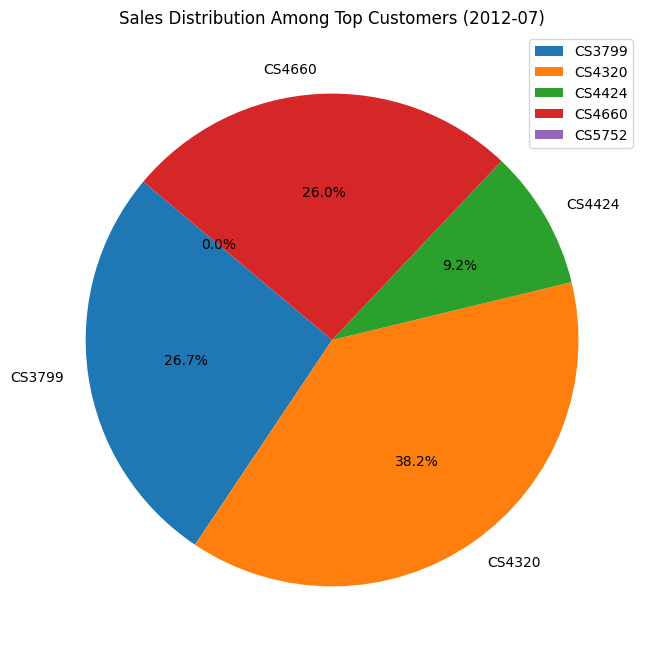

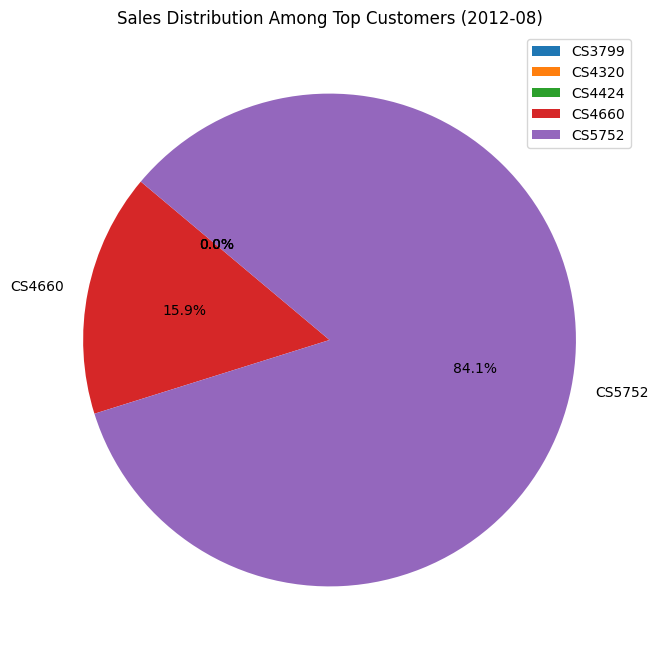

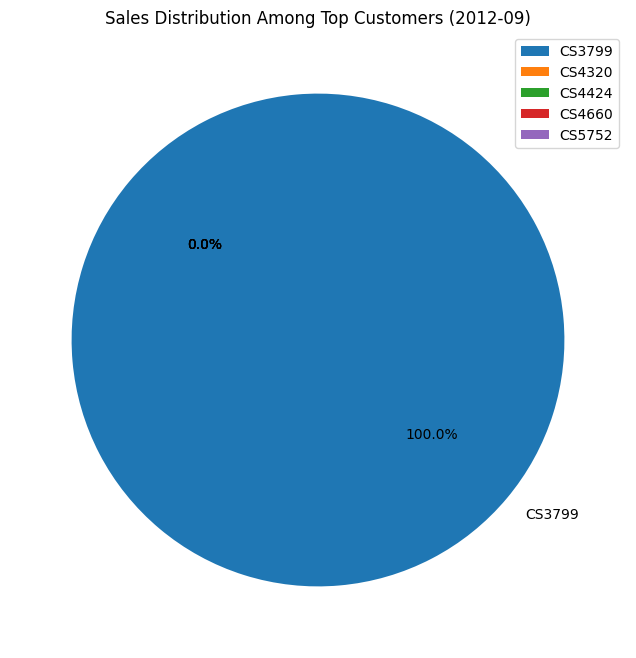

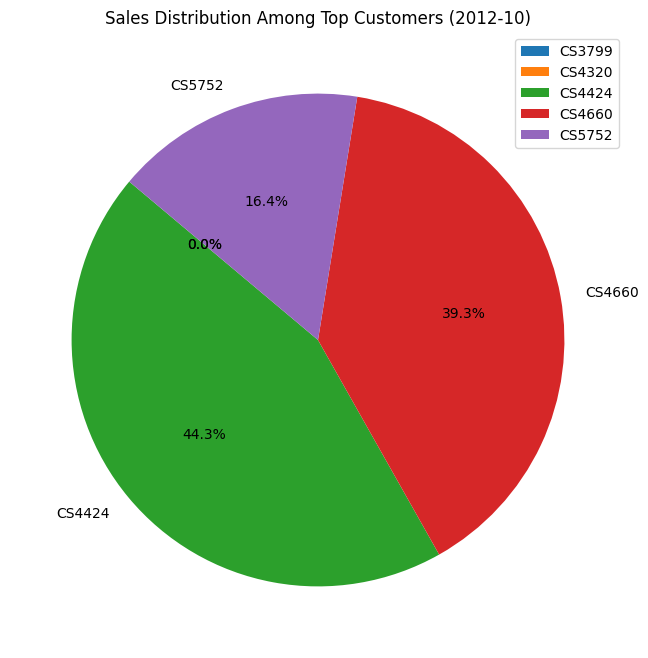

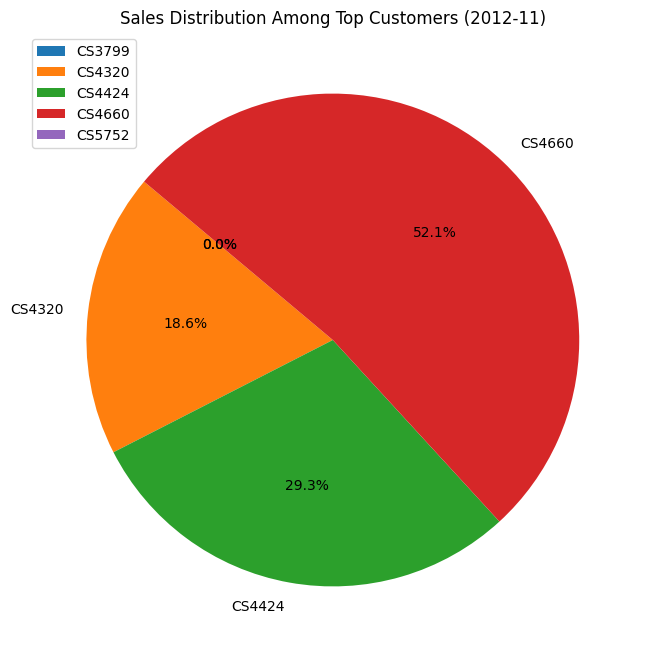

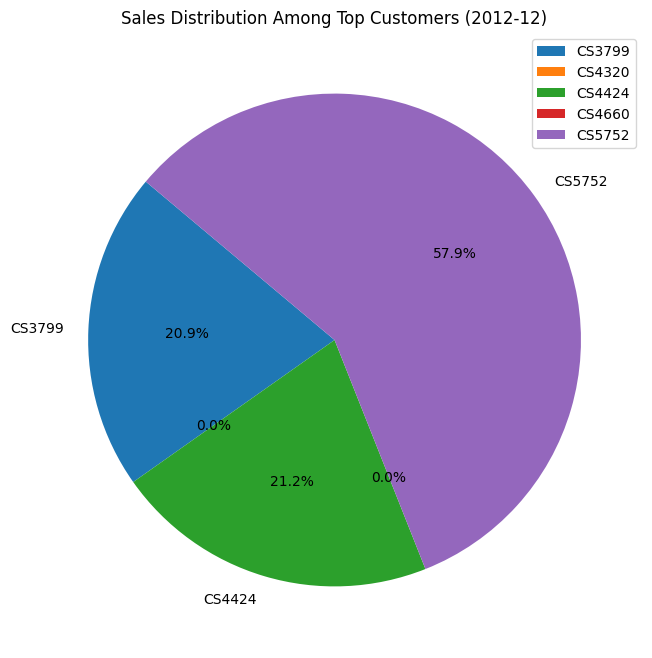

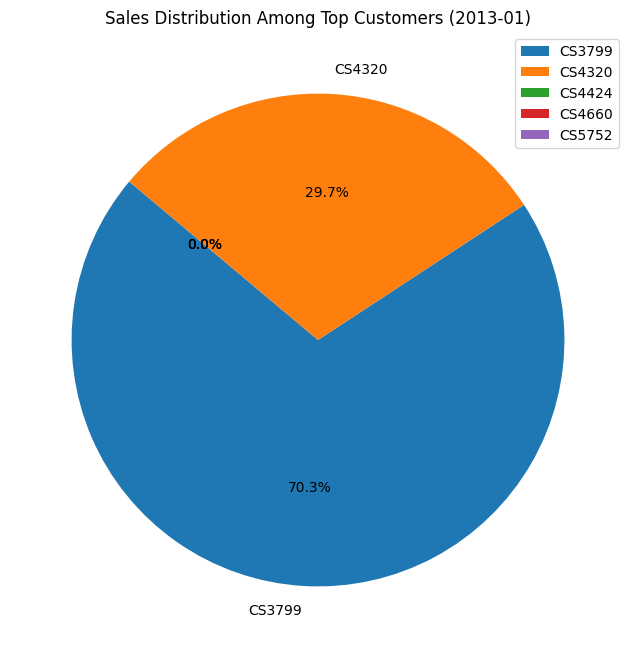

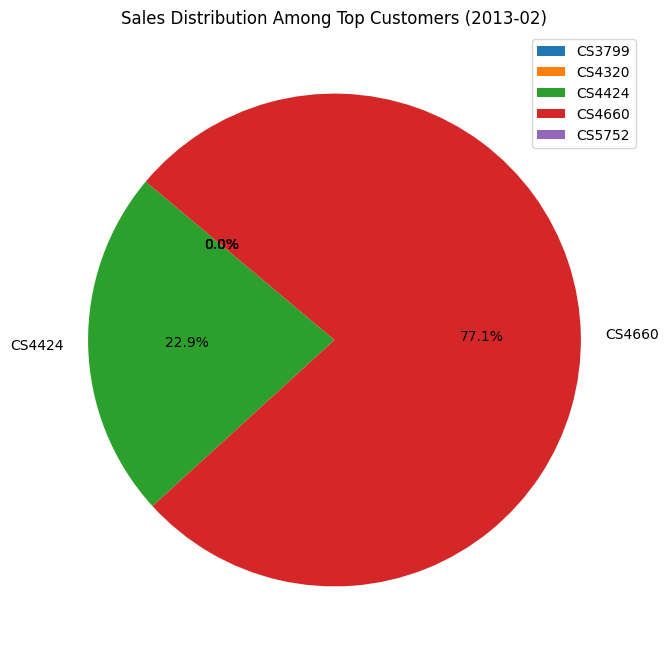

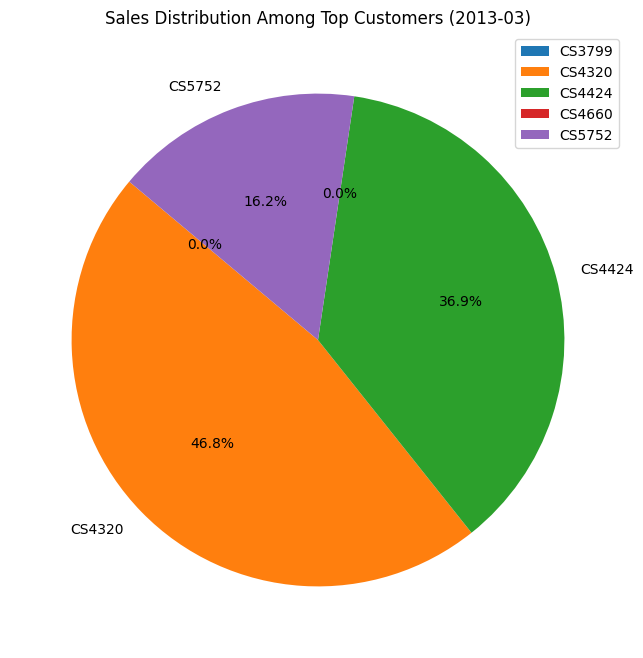

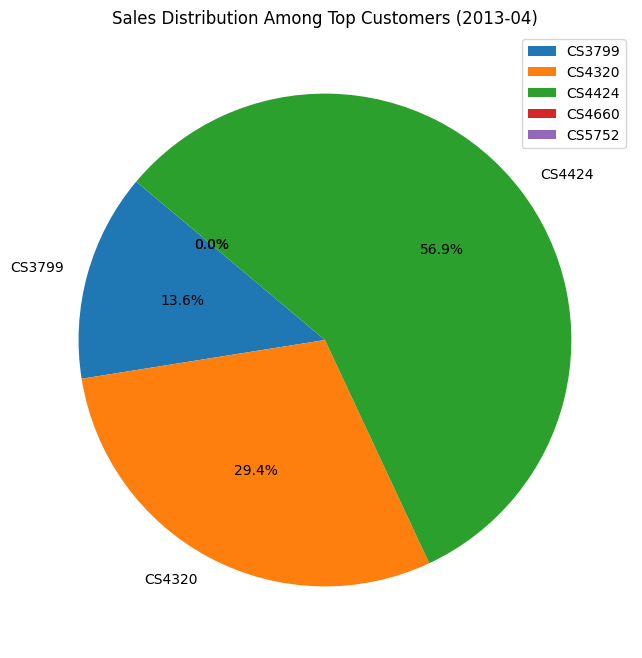

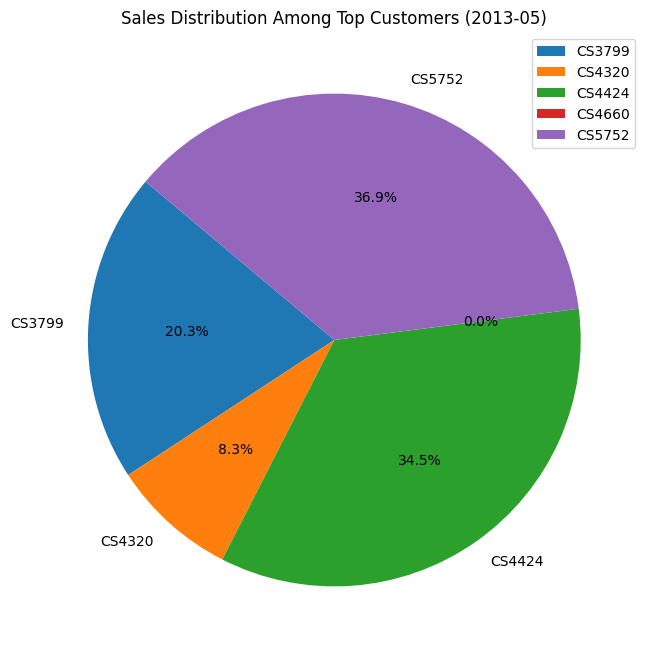

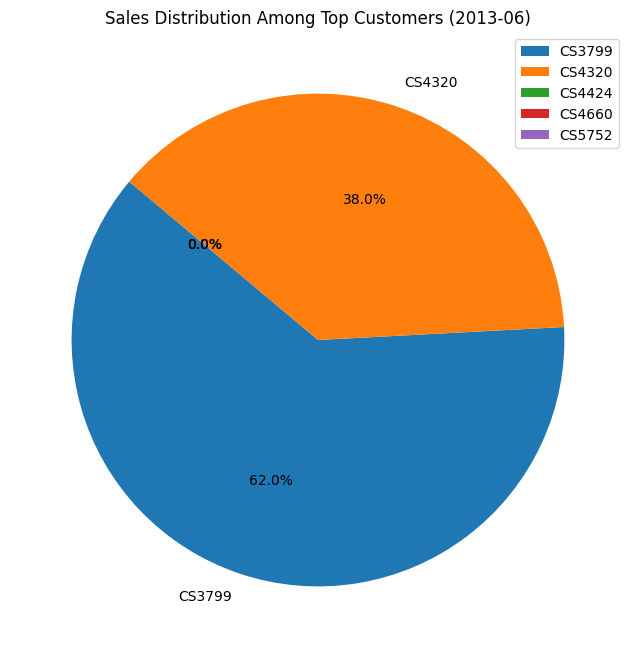

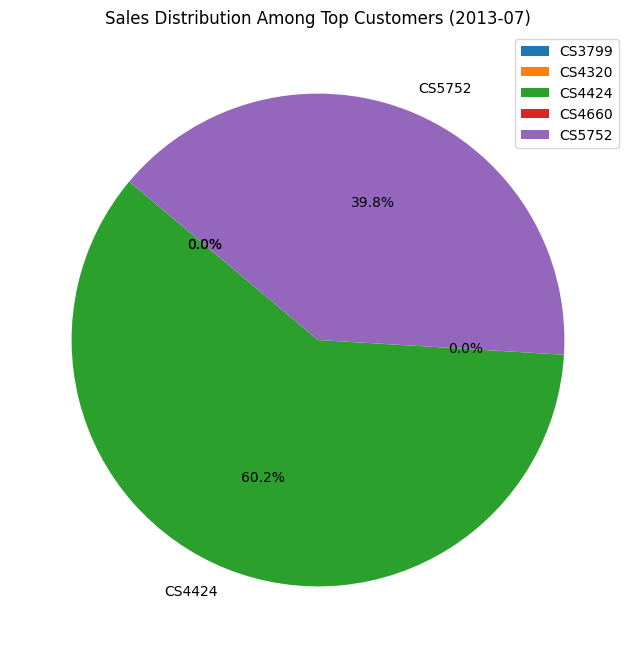

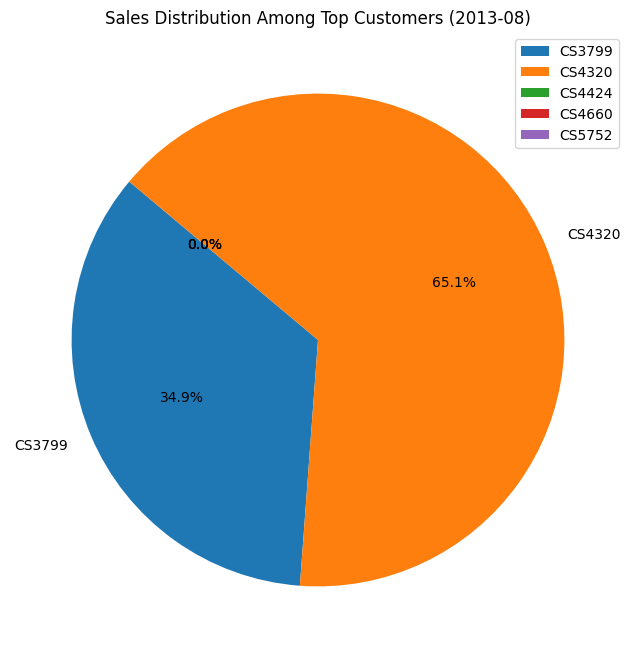

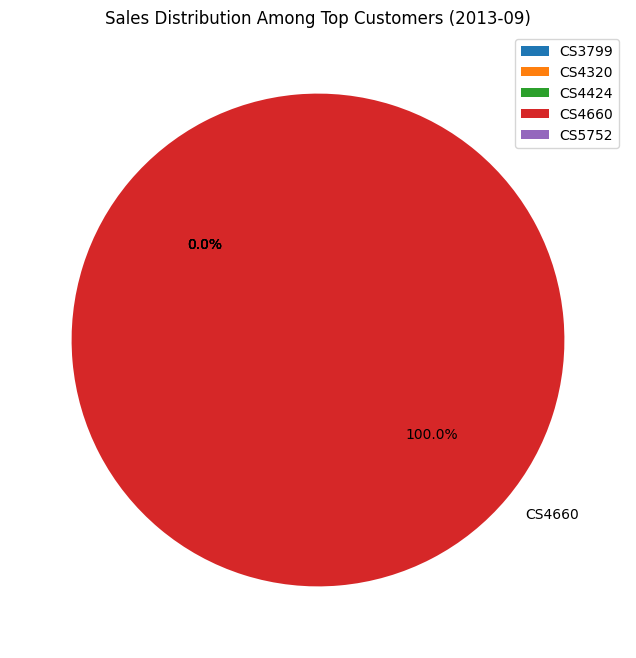

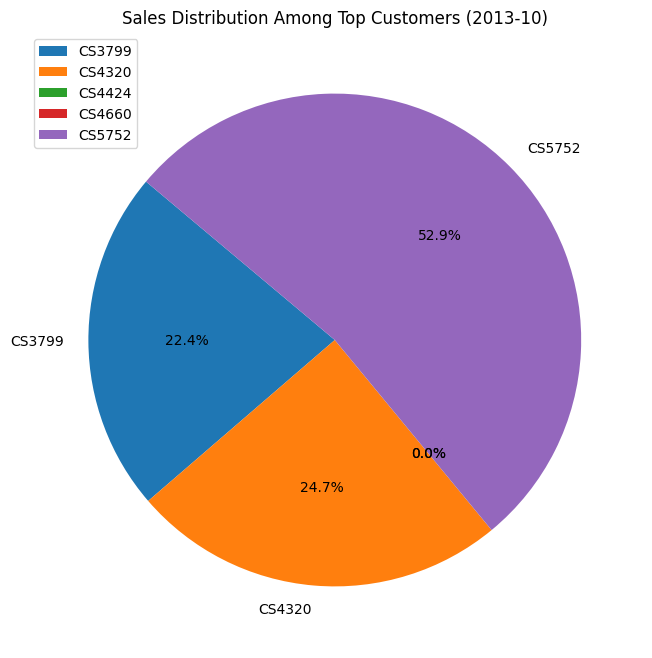

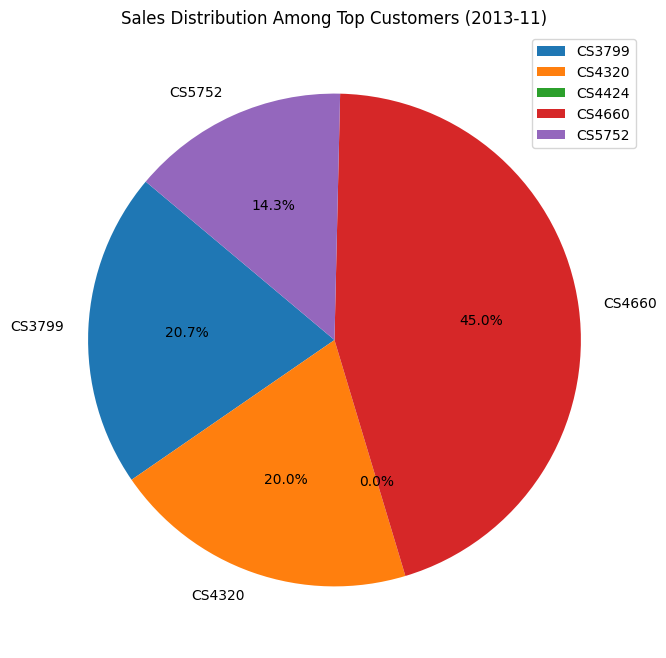

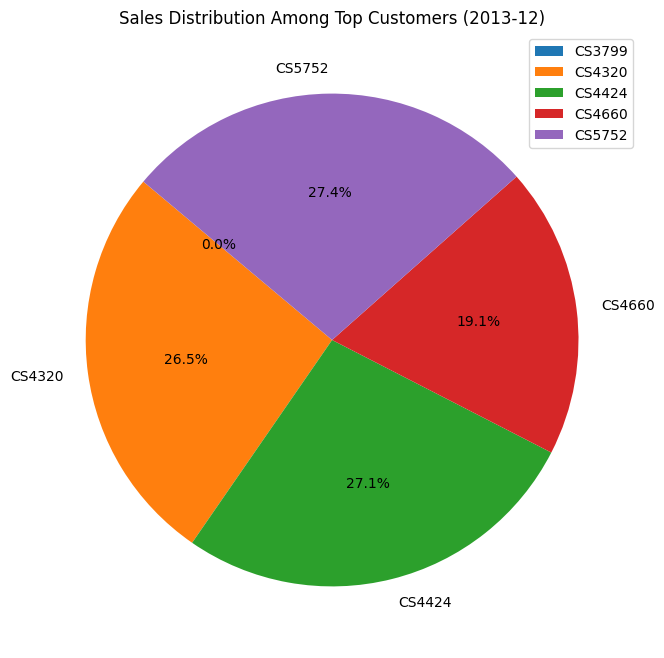

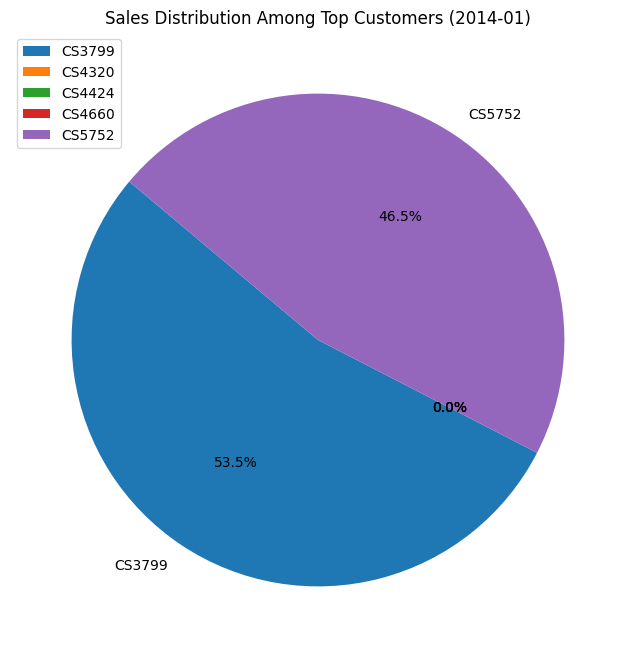

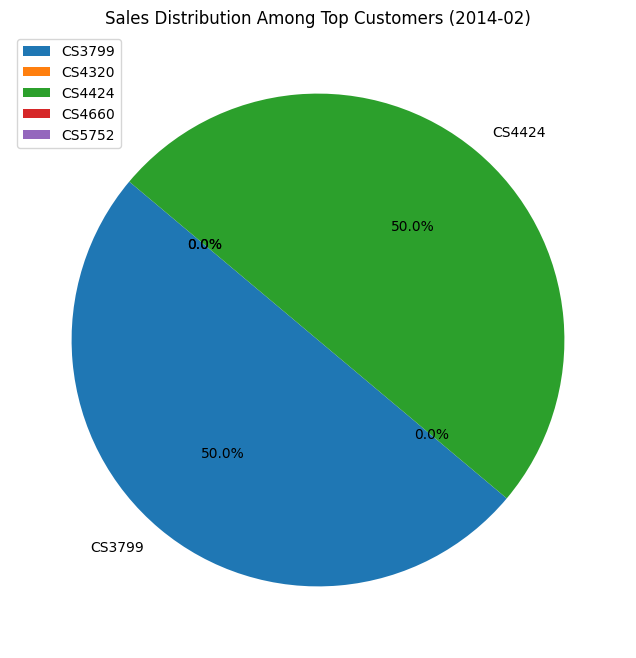

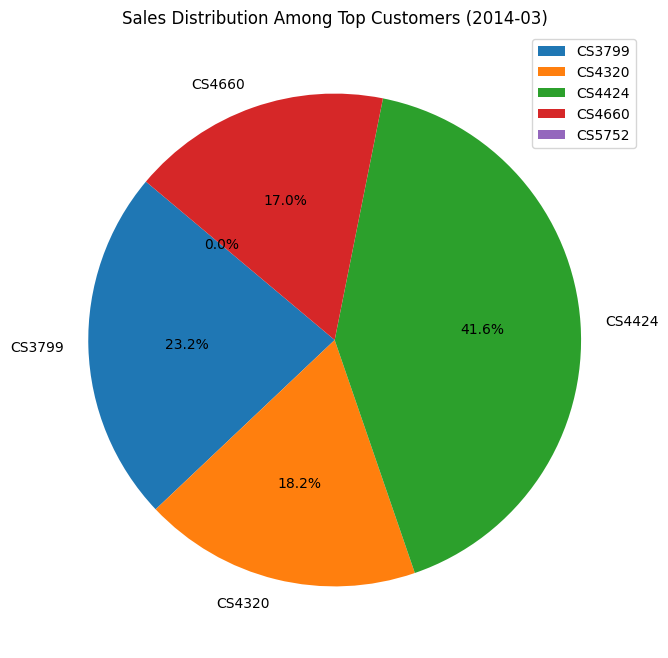

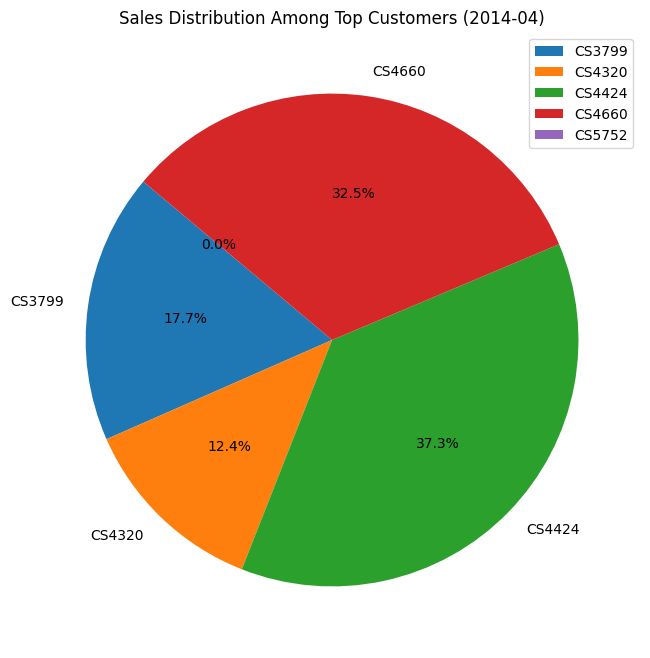

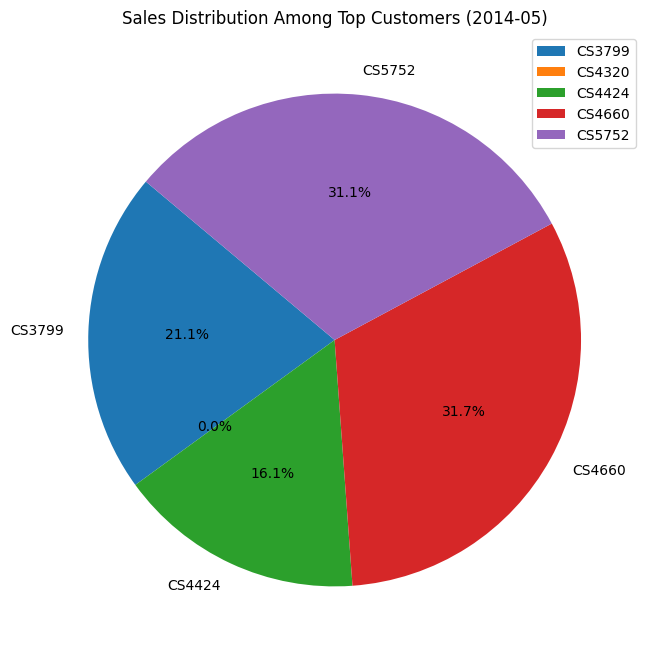

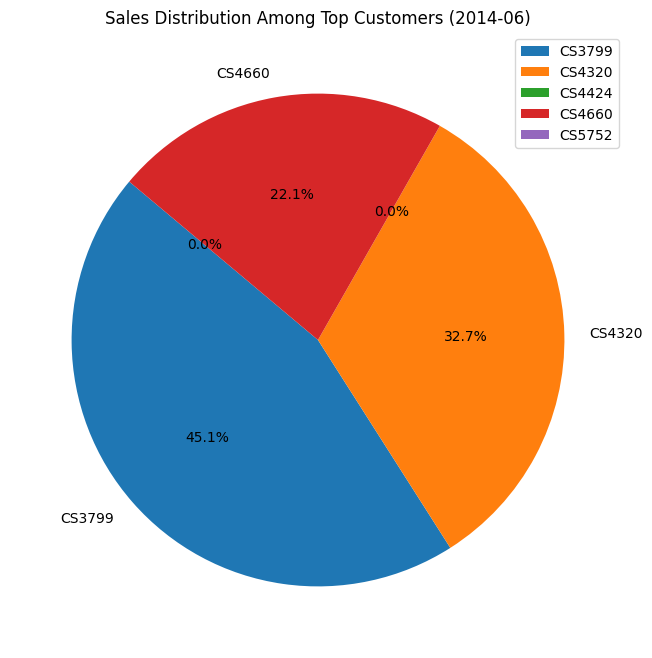

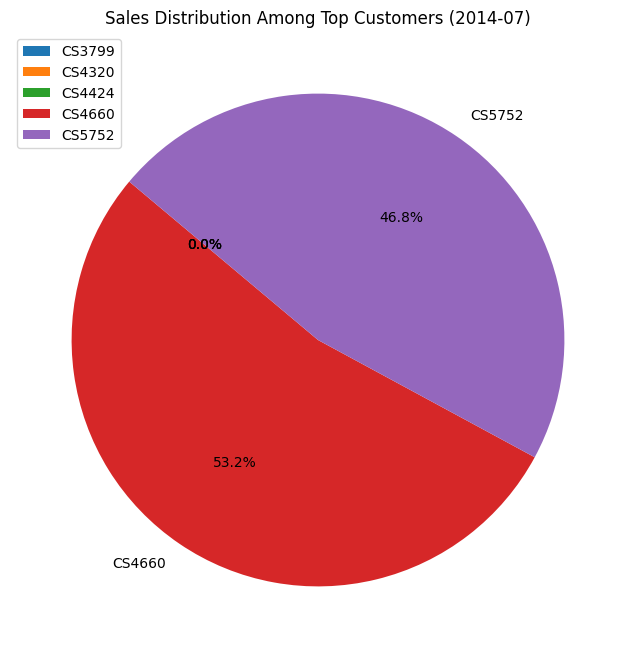

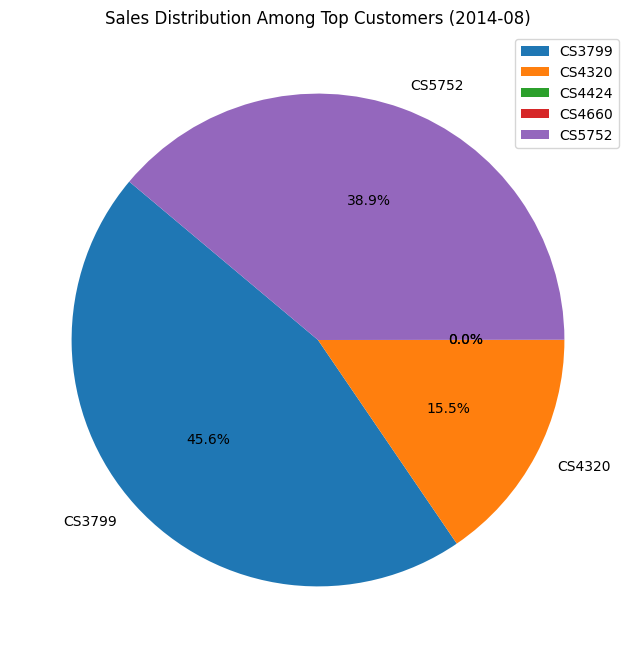

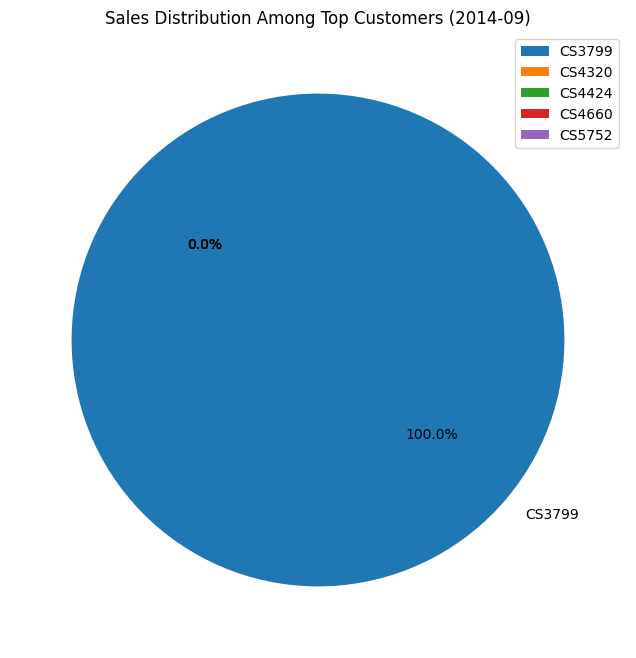

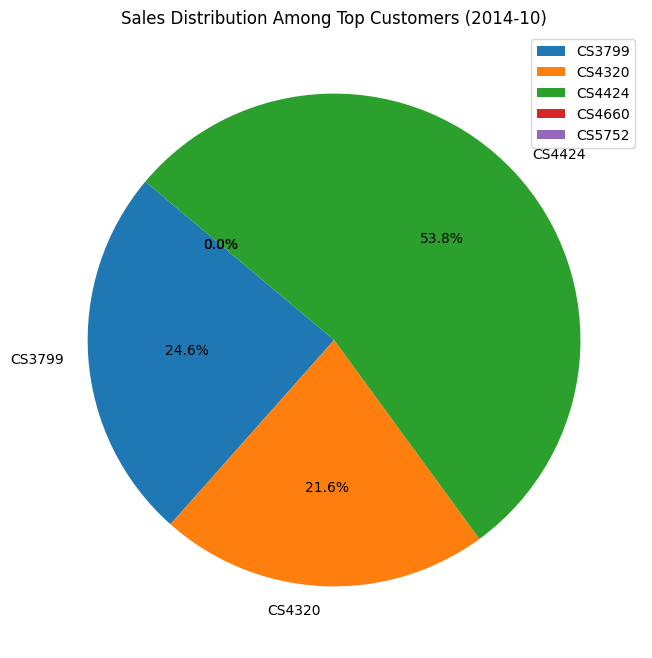

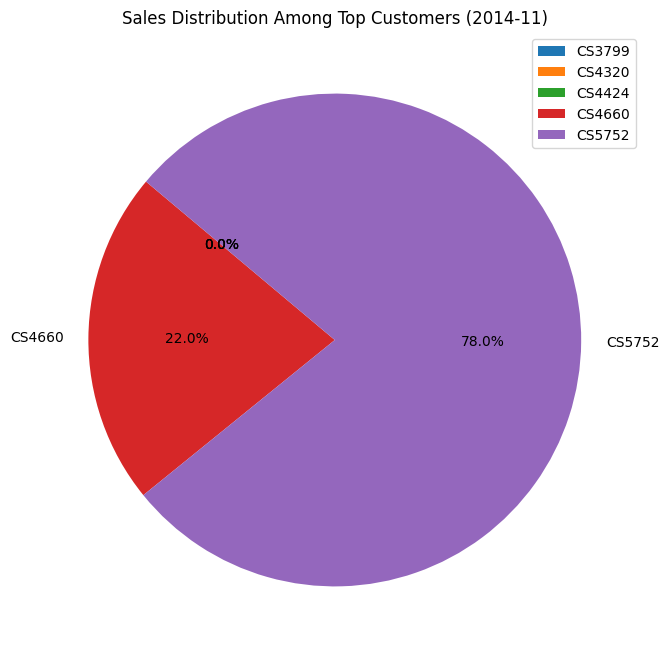

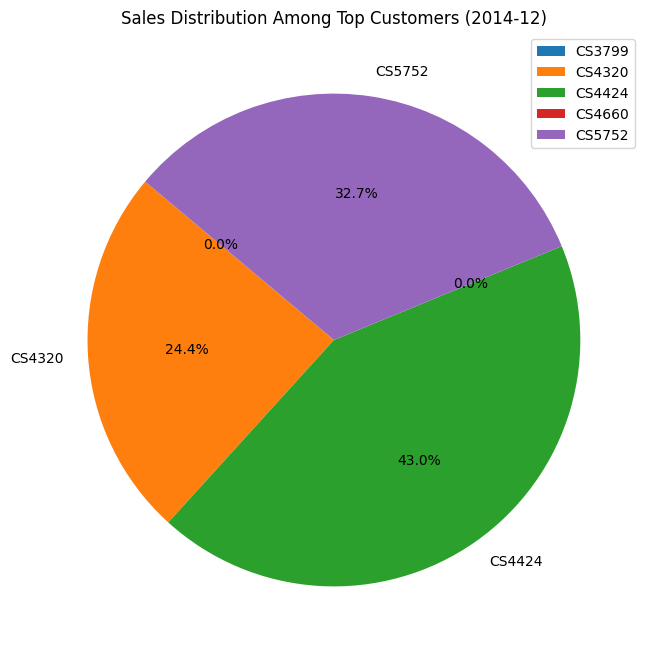

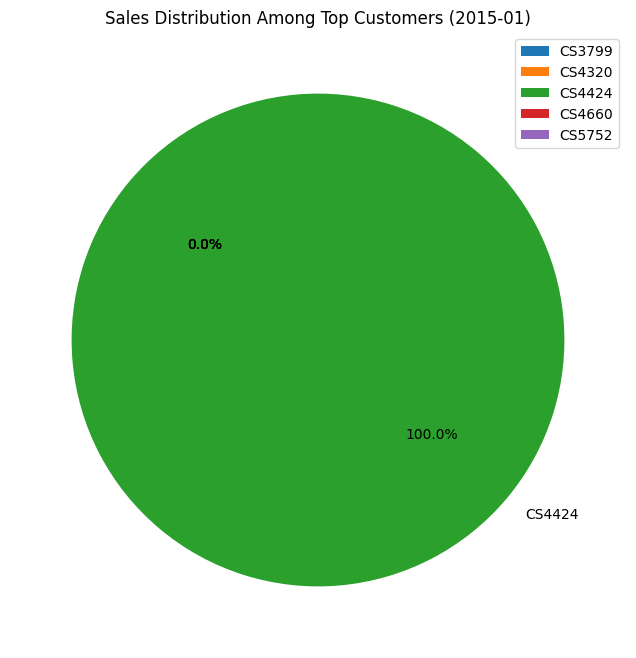

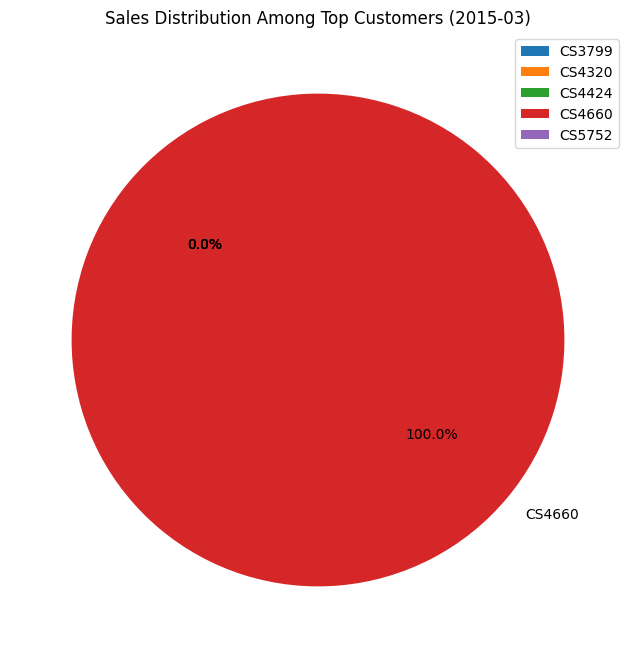

In [41]:
top_5_cus= monetary.sort_values(ascending=False).head(5).index
top_customers_df= df[df['customer_id'].isin(top_5_cus)]
top_customer_sales= top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
import matplotlib.pyplot as plt

# Plot a pie chart for each month
for month in top_customer_sales.index:
    plt.figure(figsize=(8, 8))
    top_customer_sales.loc[month].plot(kind='pie', autopct='%1.1f%%', startangle=140, legend=True, 
                                       title=f"Sales Distribution Among Top Customers ({month.strftime('%Y-%m')})")
    plt.ylabel('')  # Remove y-axis label for aesthetics
    plt.show()




Each monthly pie chart visually represents how each top customer contributed to the sales for that month, allowing easy comparison of customer performance over time.

In [74]:
df.to_csv('MainData.csv')

In [75]:
rfm.to_csv('AddAnlys.csv')